In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing 
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# import warnings
# warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)

from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT
from k12libs.utils.nb_easy import k12ai_set_notebook

In [3]:
k12ai_set_notebook(cellw=90)

## 数据探索分析

### 数据描述

属性|描述|
:---:|:---
<img width=250/> | <img width=450/>
MSSubClass|参与销售的住宅类型 包含层数、年份等
MSZoning|一般分区分类 农业、商业、工业、住宅密度等等
LotFrontage|连接到房子的街道的直线距离
LotArea|地块(皮)面积
Street|通往房子的道路类型
Alley|通往房子的小巷类型
LotShape|房子整体形状
LandContour|场地平整度
Utilities|可使用的设施
LotConfig|地段
LandSlope|坡度
Neighborhood|实际位置 附近地点
Condition1|主干道或者铁路便利程度1
Condition2|主干道或者铁路便利程度2
BldgType|住宅类型
HouseStyle|住宅风格
OverallQual|评估房屋的整体材料和装饰
OverallCond|评估房子的整体状况
YearBuilt|建造日期
YearRemodAdd|改建日期
RoofStyle|屋顶样式
RoofMatl|屋顶材料
Exterior1st|房屋外部覆盖物1
Exterior2nd|房屋外部覆盖物2
MasVnrType|砌砖类型
MasVnrArea|砖石面积
ExterQual|评估外部材料的质量
ExterCond|评估外部材料的现状
Foundation|住宅基础类型
BsmtQual|地下室高度
BsmtCond|评估地下室的状况
BsmtExposure|室外或花园曝光水平
BsmtFinType1|地下室完工区域的等级
BsmtFinSF1|type1成品的平方
BsmtFinType2|地下室完工区域的等级2
BsmtFinSF2|type2成品的平方
BsmtUnfSF|地下室未完工的平方面积
TotalBsmtSF|地下室总面积
Heating|住宅加热类型
HeatingQC|加热水平
CentralAir|是否为中央空调
Electrical|电气系统类型
1stFlrSF|一楼面积
2ndFlrSF|二楼面积
LowQualFinSF|低质量成品面积（所有楼层）
GrLivArea|地上生活面积
BsmtFullBath|地下全浴室
BsmtHalfBath|地下半浴室
FullBath|地上全浴室
HalfBath|地上半浴室
Bedroom|地上卧室（不包括地下室浴室）
Kitchen|地上厨房
KitchenQual|厨房质量
TotRmsAbvGrd|地上总房间（不包括浴室）
Functional|家庭功能性保存程度
Fireplaces|壁炉数量
FireplaceQu|壁炉质量
GarageType|车库位置
GarageYrBlt|车库建造年份
GarageFinish|车库内部装饰
GarageCars|车库车容量大小
GarageArea|车库面积
GarageQual|车库质量
GarageCond|车库条件
PavedDrive|车道铺砌方式
WoodDeckSF|木质甲板面积
OpenPorchSF|开放式门廊面积
EnclosedPorch|封闭门廊面积
3SsnPorch|三季门廊面积
ScreenPorch|屏风廊面积
PoolArea|游泳池面积
PoolQC|游泳池质量
Fence|围栏质量
MiscFeature|未包含的其他功能
MiscVal|其他功能的质量
MoSold|售出月份
YrSold|售出年份
SaleType|销售类型
SaleCondition|销售条件

### 加载数据

In [4]:
df_train = pd.read_csv(f"{K12AI_DATASETS_ROOT}/ml/house-prices/train_raw.csv")
df_test = pd.read_csv(f"{K12AI_DATASETS_ROOT}/ml/house-prices/test_raw.csv") # 无 SalePrice
df_test_target = pd.read_csv(f"{K12AI_DATASETS_ROOT}/ml/house-prices/sample_submission.csv")
df_train.shape, df_test.shape, df_test_target.shape

((1460, 81), (1459, 80), (1459, 2))

In [5]:
df_train['train'] = 1
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [6]:
df_test['train'] = 0
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,train
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


### 原始数据合并

In [7]:
df_test['SalePrice'] = df_test_target['SalePrice']
df = pd.concat([df_train, df_test], axis=0, copy=True, sort=False)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.500000,1460.000000,2189.500000,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.000000,50.000000,70.000000,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.000000,68.000000,80.000000,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.000000,9453.000000,11570.000000,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.000000,6.000000,7.000000,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.000000,5.000000,6.000000,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.500000,1973.000000,2001.000000,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.000000,1993.000000,2004.000000,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.000000,0.000000,164.000000,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.000000,368.500000,733.000000,5644.0


In [8]:
set(df.dtypes.values)

{dtype('int64'), dtype('float64'), dtype('O')}

### 分析SalePrice

In [9]:
df['SalePrice'].describe() # 没有无效或者其他非数值的数据

count      2919.000000
mean     180052.854647
std       57381.565721
min       34900.000000
25%      154795.084126
50%      176734.841494
75%      191895.744157
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'skew:2.5492483896425098 kurt: 14.665035465759864')

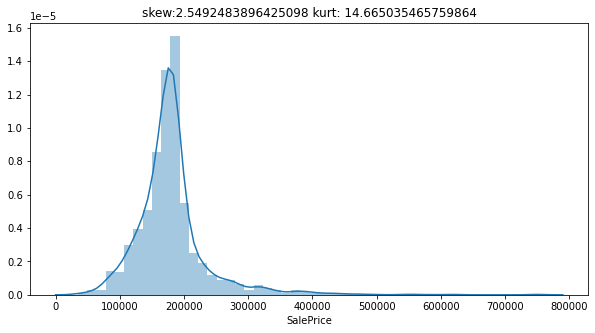

In [10]:
plt.figure(figsize=(10, 5))
sale_price = df['SalePrice']
sns.distplot(sale_price) # 右偏长尾, 峰尖
plt.title(f"skew:{sale_price.skew()} kurt: {sale_price.kurt()}")

Text(0.5, 1.0, 'skew:-0.15038107515348223 kurt: 3.7400837376032214')

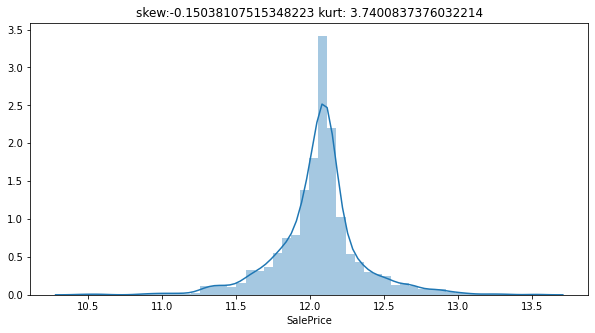

In [11]:
plt.figure(figsize=(10, 5))
log_price = np.log(df['SalePrice']) # 对变量做对数变换，使其呈现正常的正态分布
sns.distplot(log_price)
plt.title(f"skew:{log_price.skew()} kurt: {log_price.kurt()}")

### 分析影响价格的特征

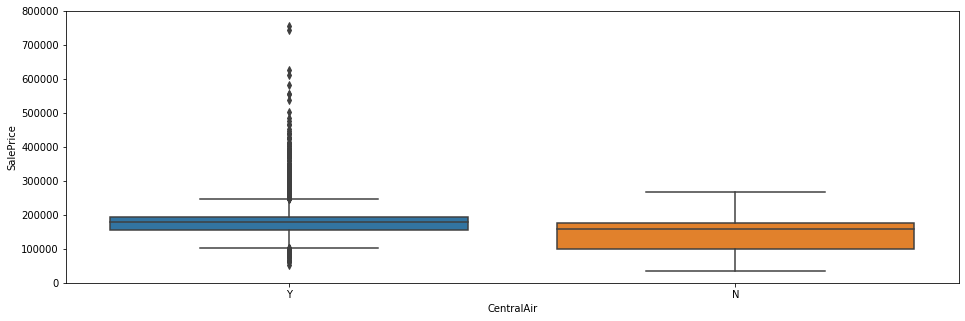

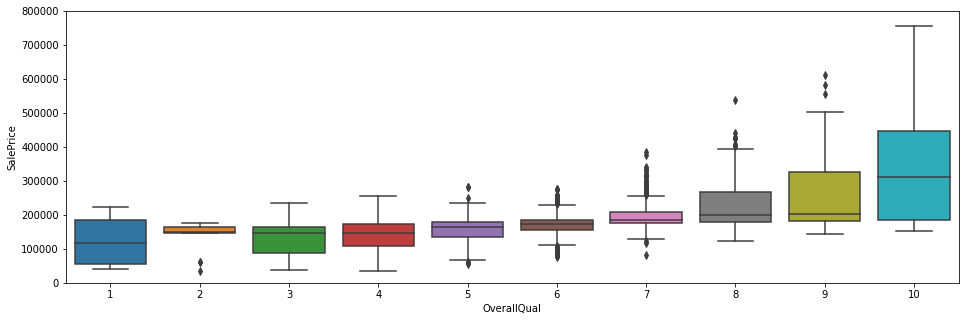

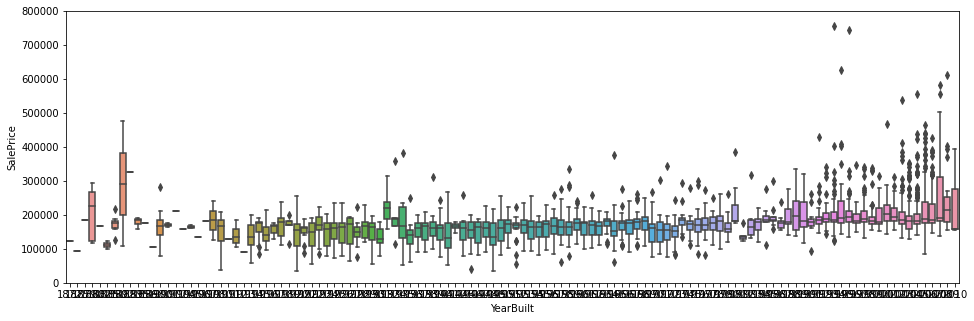

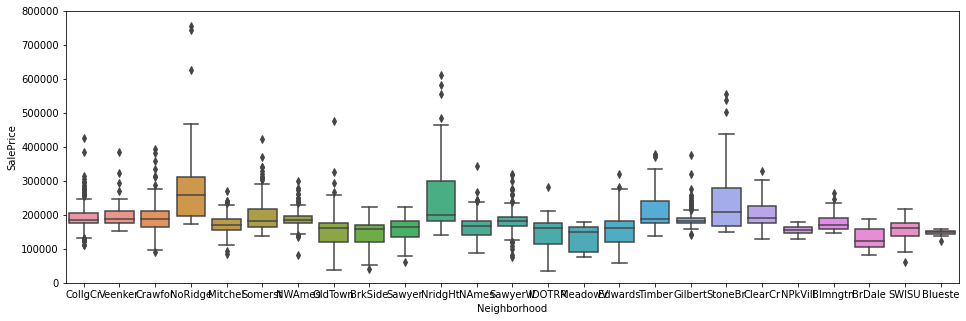

In [12]:
features = [
    'CentralAir',      # 中央空调(Y/N)
    'OverallQual',     # 整体材料和饰面质量
    'YearBuilt',       # 建造年份
    'Neighborhood',    # 地段
]

for var in features:
    plt.figure(figsize=(16, 5))
    fig = sns.boxplot(x=var, y="SalePrice", data=df)
    fig.axis(ymin=0, ymax=800000)
    plt.show()

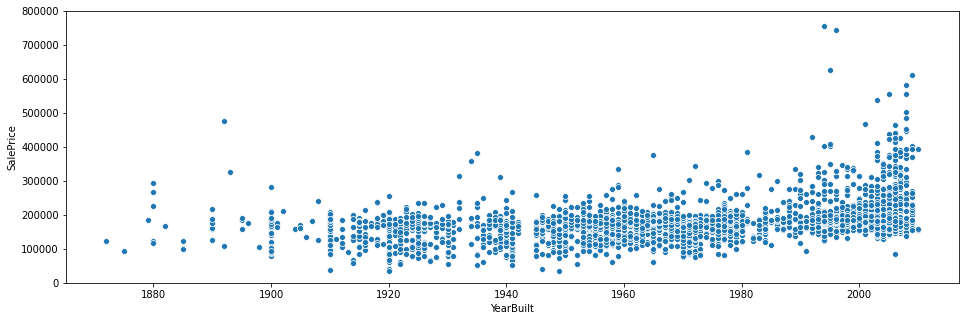

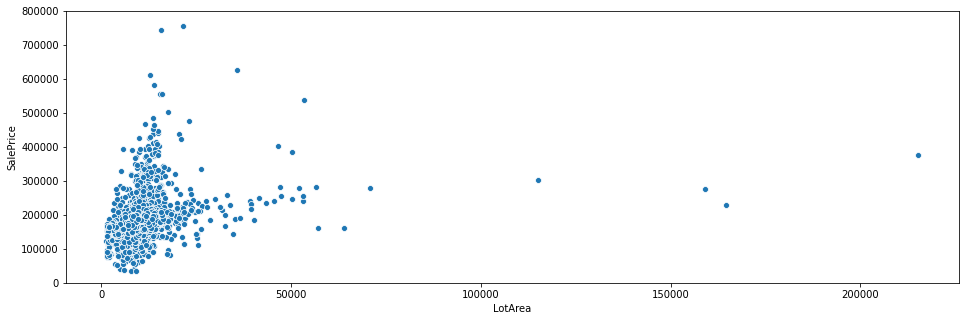

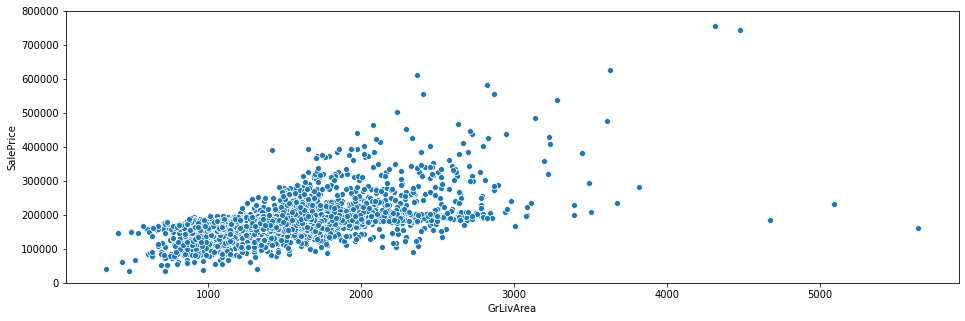

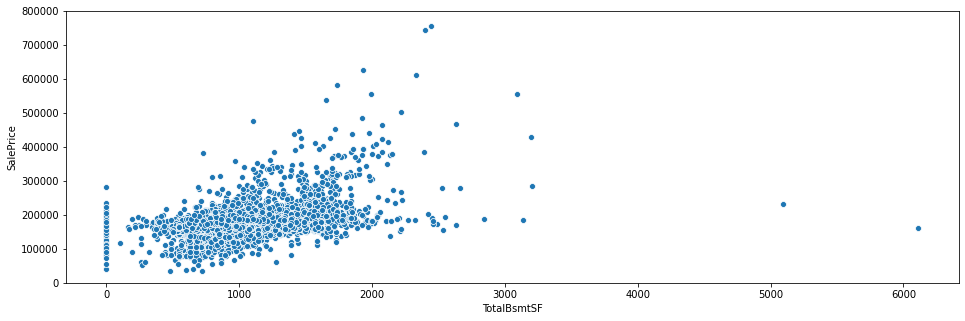

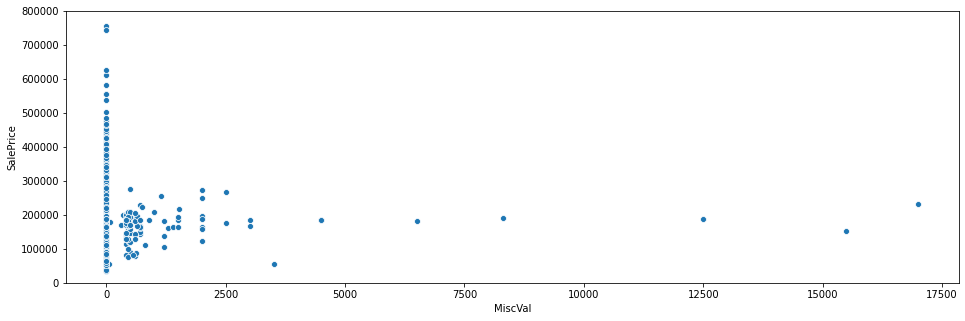

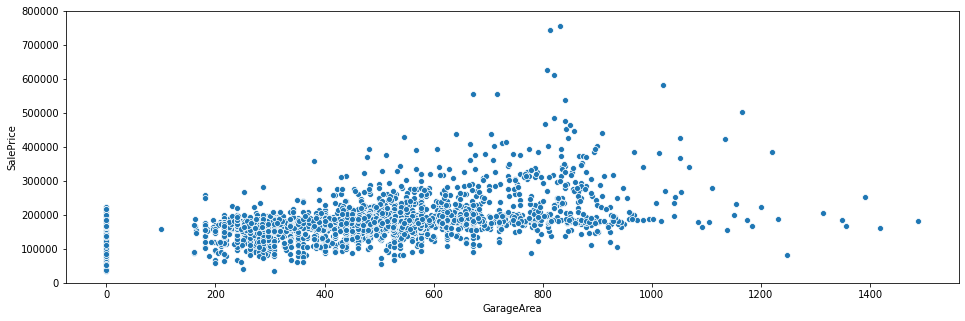

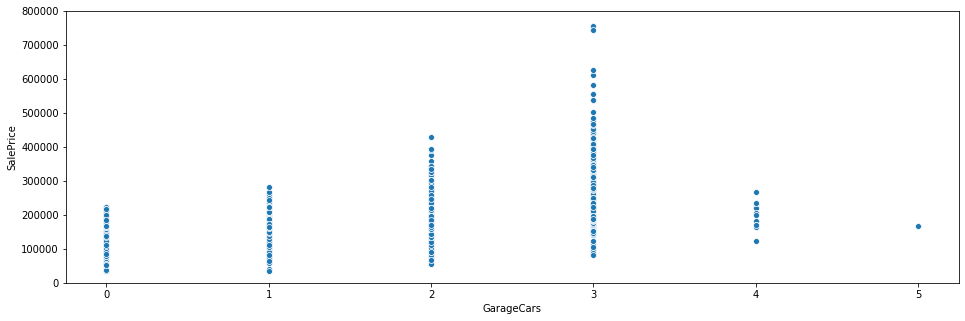

In [13]:
features = [
    'YearBuilt',     # 建造年份越晚，价格越高
    'LotArea',       # 地皮面积, 影响不大
    'GrLivArea',     # 地面上居住面积对房价的影响比较大 (线性趋势)
    'TotalBsmtSF',   # 地下室总面积有影响(线性趋势)
    'MiscVal',       # 其他功能, 影响不大
    'GarageArea',    # 车库面积
    'GarageCars',    # 车库车容量大小
]

for var in features:
    plt.figure(figsize=(16, 5))
    fig = sns.scatterplot(x=var, y="SalePrice", data=df)
    fig.axis(ymin=0, ymax=800000)
    plt.show()

### 特征关系矩阵

SalePrice        1.000000
GrLivArea        0.588010
OverallQual      0.550911
TotRmsAbvGrd     0.469800
GarageCars       0.469249
GarageArea       0.464809
1stFlrSF         0.462865
TotalBsmtSF      0.453224
FullBath         0.433710
YearBuilt        0.362066
MasVnrArea       0.355608
Fireplaces       0.353567
YearRemodAdd     0.350032
GarageYrBlt      0.325297
LotFrontage      0.318084
LotArea          0.296497
BsmtFinSF1       0.272202
2ndFlrSF         0.272140
WoodDeckSF       0.238381
OpenPorchSF      0.236376
BedroomAbvGr     0.229611
HalfBath         0.228837
BsmtUnfSF        0.175195
BsmtFullBath     0.148210
ScreenPorch      0.082308
PoolArea         0.081039
MoSold           0.067222
3SsnPorch        0.029979
train            0.015141
MiscVal         -0.000037
BsmtFinSF2      -0.007437
Id              -0.011630
BsmtHalfBath    -0.012623
LowQualFinSF    -0.015395
YrSold          -0.039064
OverallCond     -0.065785
EnclosedPorch   -0.070698
KitchenAbvGr    -0.071760
MSSubClass  

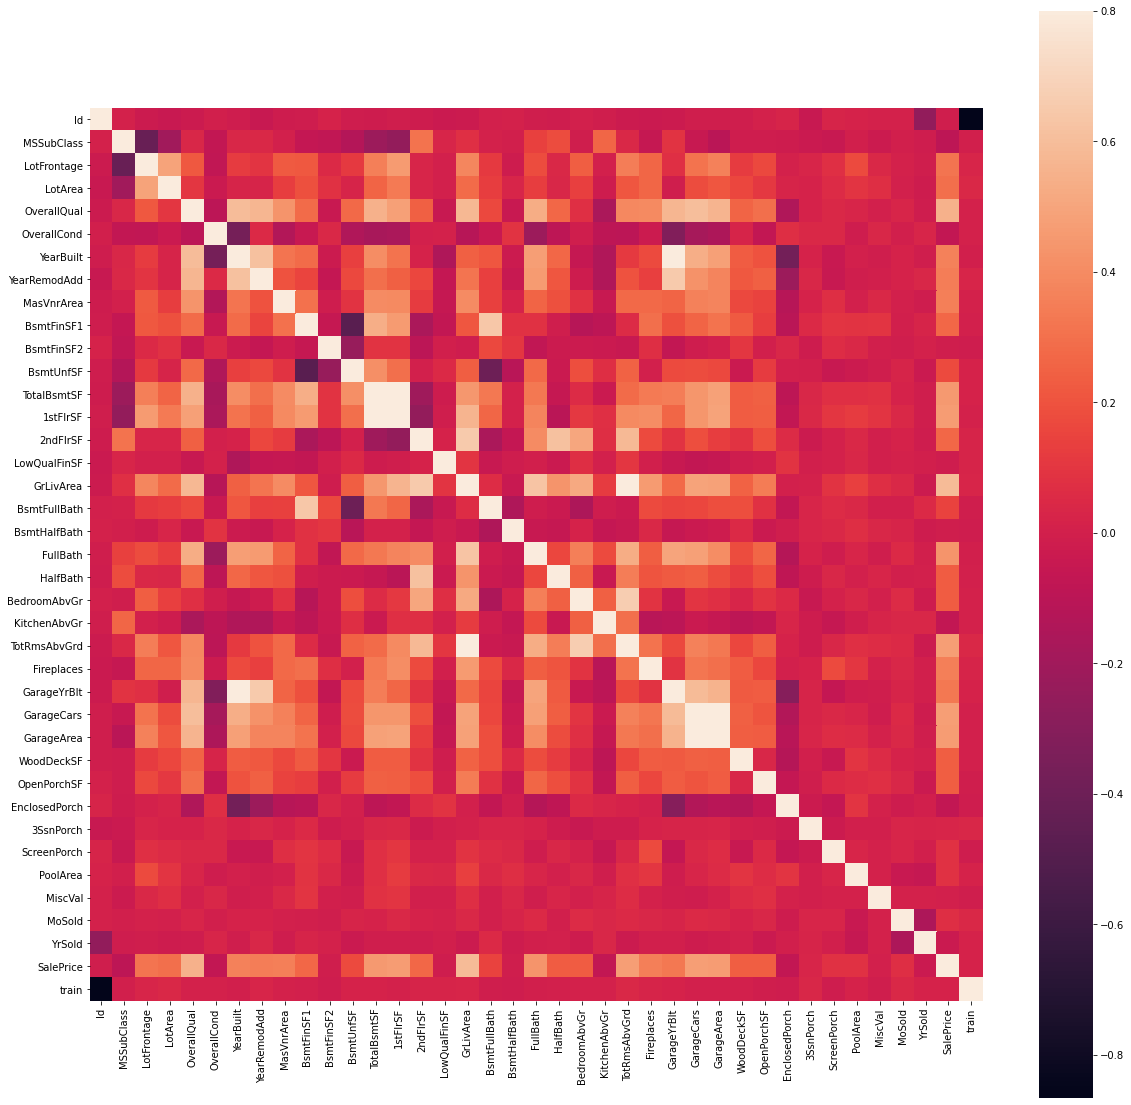

In [14]:
plt.figure(figsize=(20, 20))
corrmat = df.corr()
sns.heatmap(corrmat, vmax=0.8, square=True);
corrmat['SalePrice'].sort_values(ascending =False)

### 房价关系矩阵(TOP10)

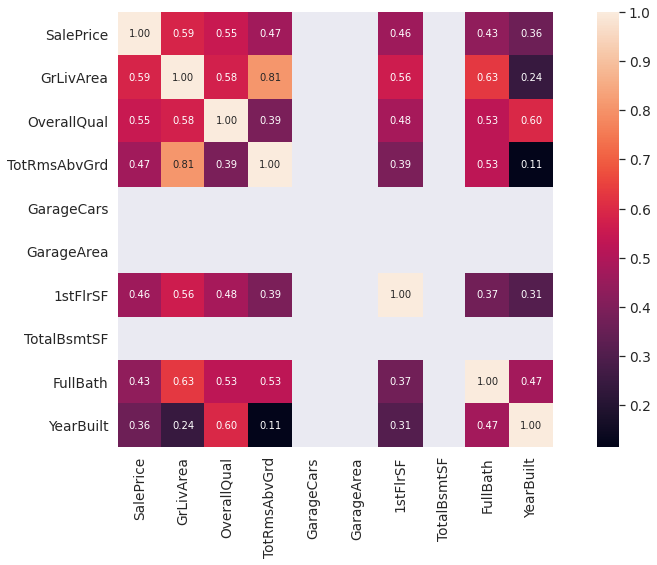

In [15]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(16, 8))
sns.heatmap(cm, cbar=True, annot=True,
            square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values);

### 绘制关系点图

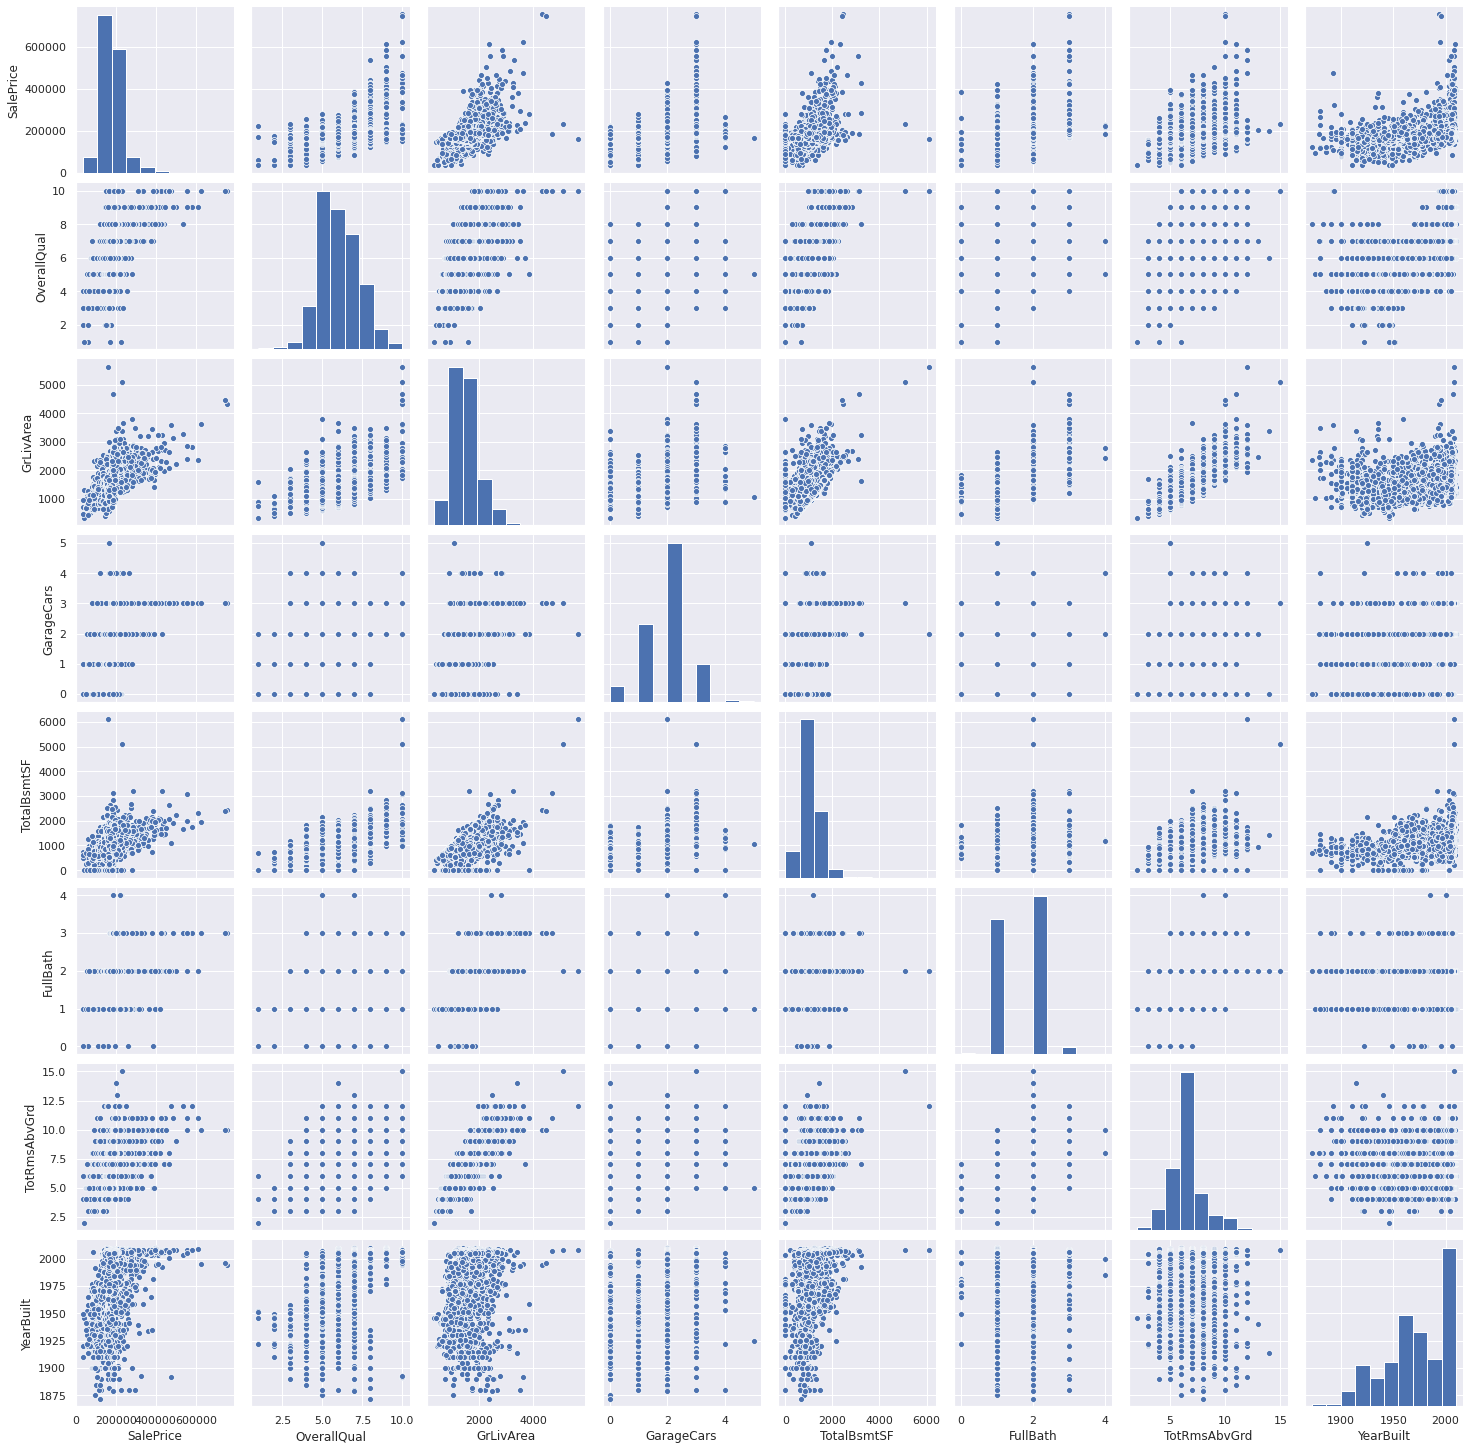

In [16]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5);

##  数据清洗

### 离群点处理

In [17]:
df.drop(df[(df['OverallQual']<5) & (df['SalePrice']>200000)].index,inplace=True)
df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)].index,inplace=True)
df.drop(df[(df['YearBuilt']<1900) & (df['SalePrice']>400000)].index,inplace=True)
df.drop(df[(df['TotalBsmtSF']>6000) & (df['SalePrice']<200000)].index,inplace=True)
df.reset_index(drop=True, inplace=True)

df.shape

(2897, 82)

### 删除空值率高的特征

In [18]:
# 计算每个特征的空值百分比
features_nan = pd.DataFrame([(c, df[c].isna().mean() * 100) for c in df], columns=["feature", "percent"])
features_nan[70:]

,feature,percent
70,ScreenPorch,0.000000
71,PoolArea,0.000000
72,PoolQC,99.689334
73,Fence,80.497066
74,MiscFeature,96.444598
75,MiscVal,0.000000
76,MoSold,0.000000
77,YrSold,0.000000
78,SaleType,0.034518
79,SaleCondition,0.000000


In [19]:
# 列出空值率超过50%的
features_nan_50 = features_nan[features_nan.percent > 50]
features_nan_50

,feature,percent
6,Alley,93.234380
72,PoolQC,99.689334
73,Fence,80.497066
74,MiscFeature,96.444598


In [20]:
features_nan_50.feature.tolist()

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [21]:
# 删除空值率比较高的特征
df = df.drop(features_nan_50.feature.tolist(), axis=1)

### 特征数据类型

In [22]:
object_df = df.select_dtypes(include=['object'])
number_df = df.select_dtypes(exclude=['object'])
set([str(x) for x in object_df.dtypes.values]), set([str(x) for x in number_df.dtypes.values])

({'object'}, {'float64', 'int64'})

In [23]:
type(object_df), type(object_df.dtypes)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [24]:
object_df.dtypes.index

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
number_df.dtypes.index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'train'],
      dtype='object')

#### 类别类型处理

In [26]:
# 分类特征的空值情况
null_counts = object_df.isna().sum()
# null_counts.sort_index()
null_counts.sort_values(ascending=False)

FireplaceQu      1410
GarageCond        156
GarageQual        156
GarageFinish      156
GarageType        154
BsmtCond           79
BsmtExposure       79
BsmtQual           78
BsmtFinType2       77
BsmtFinType1       76
MasVnrType         23
MSZoning            3
Utilities           2
Functional          2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
LandContour         0
BldgType            0
LotShape            0
LotConfig           0
LandSlope           0
Street              0
Neighborhood        0
Condition1          0
Condition2          0
SaleCondition       0
HouseStyle          0
RoofStyle           0
RoofMatl            0
ExterQual           0
ExterCond           0
Heating             0
HeatingQC           0
CentralAir          0
PavedDrive          0
Foundation          0
dtype: int64

In [27]:
# 对于空值数量太多的, 采用None填充
null_counts_50 = null_counts[null_counts > 50]
columns_none = null_counts_50.index.tolist()
columns_none

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [28]:
object_df[columns_none].tail()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
2892,TA,TA,No,Unf,Unf,NaN,NaN,NaN,NaN,NaN
2893,TA,TA,No,Rec,Unf,NaN,CarPort,Unf,TA,TA
2894,TA,TA,No,ALQ,Unf,TA,Detchd,Unf,TA,TA
2895,Gd,TA,Av,GLQ,Unf,NaN,NaN,NaN,NaN,NaN
2896,Gd,TA,Av,LwQ,Unf,TA,Attchd,Fin,TA,TA


In [29]:
object_df[columns_none] = object_df[columns_none].fillna('None') # SettingWithCopyWarning
object_df[columns_none].tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
2892,TA,TA,No,Unf,Unf,None,None,None,None,None
2893,TA,TA,No,Rec,Unf,None,CarPort,Unf,TA,TA
2894,TA,TA,No,ALQ,Unf,TA,Detchd,Unf,TA,TA
2895,Gd,TA,Av,GLQ,Unf,None,None,None,None,None
2896,Gd,TA,Av,LwQ,Unf,TA,Attchd,Fin,TA,TA


In [30]:
# 对于空值数量不多的, 采用中值填充
null_counts_low = null_counts[null_counts[null_counts > 0] & null_counts[null_counts < 50]]
columns_none = null_counts_low.index.tolist() 
columns_none

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Electrical',
 'KitchenQual',
 'Functional',
 'SaleType']

In [31]:
object_df.mode().iloc[0]

MSZoning              RL
Street              Pave
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood       NAmes
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              TA
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         GLQ
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
KitchenQual           TA
Functional           Typ
FireplaceQu         None
GarageType        Attchd
GarageFinish         Unf
GarageQual            TA
GarageCond            TA
PavedDrive             Y
SaleType              WD
SaleCondition     Normal
Name: 0, dtype: object

In [32]:
object_df[columns_none] = object_df[columns_none].fillna(object_df.mode().iloc[0])  # SettingWithCopyWarning

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
null_counts = object_df.isna().sum()
null_counts.sort_index()

BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
Neighborhood     0
PavedDrive       0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

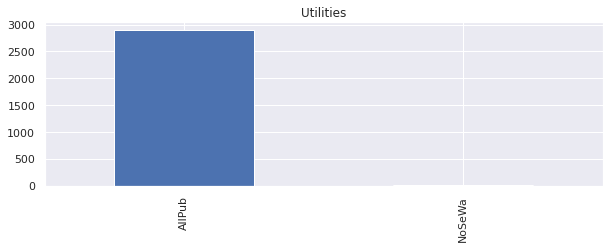

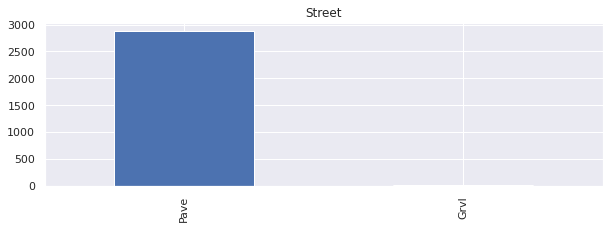

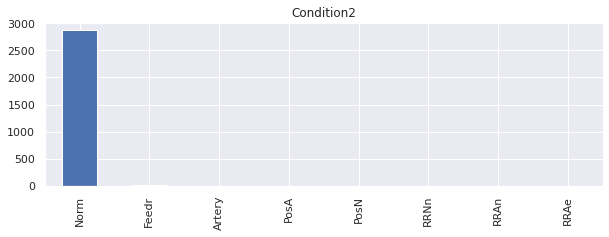

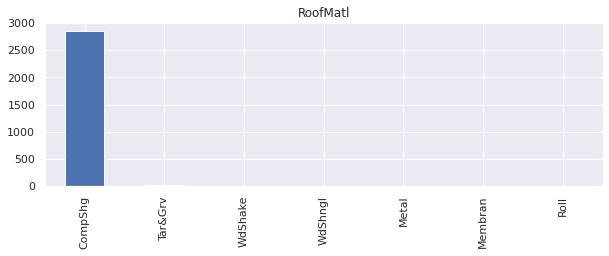

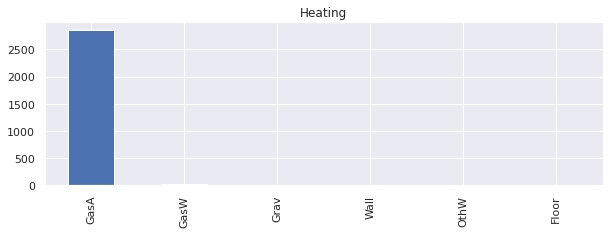

In [34]:
# 剔除异常的特征分布
observers = ['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating']
for ov in observers:
    object_df[ov].value_counts().plot(kind='bar',figsize=[10,3], title=ov) # 不均匀分布
    plt.show()
# 删除
object_df = object_df.drop(observers, axis=1)

#### 数值类型处理

In [35]:
# 数值类型空值
null_counts = number_df.isna().sum()
null_counts.sort_values(ascending=False)

LotFrontage      482
GarageYrBlt      156
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
GarageCars         1
GarageArea         1
GrLivArea          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
MSSubClass         0
train              0
FullBath           0
SalePrice          0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
Id                 0
dtype: int64

In [36]:
# 填充GarageYrBlt 和 LotFrontage
mval_build_sold = (number_df['YrSold'] - number_df['YearBuilt']).median()
mval_lotfrontage = number_df["LotFrontage"].median()
mval_build_sold, mval_lotfrontage 

(35.0, 68.0)

In [37]:
number_df['GarageYrBlt'] = number_df['GarageYrBlt'].fillna(number_df['YrSold'] - mval_build_sold) # SettingWithCopyWarning
number_df['LotFrontage'] = number_df['LotFrontage'].fillna(mval_lotfrontage) # SettingWithCopyWarning

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# 其他的填充0
number_df = number_df.fillna(0)
null_counts = number_df.isna().sum()
null_counts.sort_values(ascending=False)

train            0
BsmtFinSF1       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
MasVnrArea       0
BsmtHalfBath     0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
MSSubClass       0
BsmtFullBath     0
FullBath         0
SalePrice        0
OpenPorchSF      0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
WoodDeckSF       0
HalfBath         0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
Id               0
dtype: int64

In [39]:
number_df = number_df.drop(['Id'], axis=1)

### 重新合并

In [40]:
df_final = pd.concat([object_df, number_df], axis=1, sort=False)
df_final.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,61,0,0,0,0,0,2,2008,208500.0,1
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,0,0,0,0,0,0,5,2007,181500.0,1
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,42,0,0,0,0,0,9,2008,223500.0,1
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,35,272,0,0,0,0,2,2006,140000.0,1
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,84,0,0,0,0,0,12,2008,250000.0,1


In [ ]:
# 保存
df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train'], axis=1)

df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['train'], axis=1)

In [76]:
df_train.to_csv(f'{K12AI_DATASETS_ROOT}/ml/house-prices/train.csv', index=False)
df_test.to_csv(f'{K12AI_DATASETS_ROOT}/ml/house-prices/test.csv', index=False)

--------------------------

### 增加新的特征

#### AgeHouse

In [42]:
df_final['AgeHouse']= (df_final['YrSold'] - df_final['YearBuilt'])
df_final['AgeHouse'].describe() # min: -1 说明数据有问题

count    2897.000000
mean       36.436659
std        30.305914
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: AgeHouse, dtype: float64

In [43]:
# 查看新增特征是否有异常值 (YearRemodAdd 作为 YrSold)
neg_value = df_final[df_final['AgeHouse'] < 0]
neg_value 

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,AgeHouse
2532,RL,IR1,Bnk,Inside,Gtl,Edwards,Norm,1Fam,1Story,Hip,...,0,0,0,0,17000,10,2007,230841.338626,0,-1


In [44]:
neg_rows = df_final['YrSold'] < df_final['YearBuilt']
df_final.loc[neg_rows, 'YrSold'] = df_final.loc[neg_rows, 'YearRemodAdd']

In [45]:
df_final['AgeHouse']= (df_final['YrSold'] - df_final['YearBuilt'])
df_final['AgeHouse'].describe() # min: 0

count    2897.000000
mean       36.437349
std        30.305084
min         0.000000
25%         7.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: AgeHouse, dtype: float64

#### TotalSA

In [46]:
df_final['TotalSA'] = df_final['TotalBsmtSF'] + df_final['1stFlrSF'] + df_final['2ndFlrSF']

### 特征编码

#### 顺序类别编码

In [47]:
set(df_final['ExterQual'].values), set(df_final['BsmtQual'].values), \
set(df_final['Foundation'].values), set(df_final['KitchenQual'].values), \
set(df_final['BsmtFinType1'].values)

({'Ex', 'Fa', 'Gd', 'TA'},
 {'Ex', 'Fa', 'Gd', 'None', 'TA'},
 {'BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'},
 {'Ex', 'Fa', 'Gd', 'TA'},
 {'ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf'})

In [48]:
bin_map  = {
    'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
    "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
}

df_final['PavedDrive'] = df_final['PavedDrive'].map({'N' : 0, 'P' : 1, 'Y' : 2})

In [49]:
df_final['ExterQual'] = df_final['ExterQual'].map(bin_map)
df_final['ExterCond'] = df_final['ExterCond'].map(bin_map)
df_final['BsmtCond'] = df_final['BsmtCond'].map(bin_map)
df_final['BsmtQual'] = df_final['BsmtQual'].map(bin_map)
df_final['HeatingQC'] = df_final['HeatingQC'].map(bin_map)
df_final['KitchenQual'] = df_final['KitchenQual'].map(bin_map)
df_final['FireplaceQu'] = df_final['FireplaceQu'].map(bin_map)
df_final['GarageQual'] = df_final['GarageQual'].map(bin_map)
df_final['GarageCond'] = df_final['GarageCond'].map(bin_map)
df_final['CentralAir'] = df_final['CentralAir'].map(bin_map)
df_final['LotShape'] = df_final['LotShape'].map(bin_map)
df_final['BsmtExposure'] = df_final['BsmtExposure'].map(bin_map)
df_final['BsmtFinType1'] = df_final['BsmtFinType1'].map(bin_map)
df_final['BsmtFinType2'] = df_final['BsmtFinType2'].map(bin_map)

#### 时间特征编码


In [50]:
list(set(df_final['YearBuilt'].values))[20:30]

[1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919]

In [51]:
lab = preprocessing.LabelEncoder()  # 不扩大特征数
df_final['YearBuilt'] = lab.fit_transform(df_final['YearBuilt'])
df_final['YearRemodAdd'] = lab.fit_transform(df_final['YearRemodAdd'])

In [52]:
list(set(df_final['YearBuilt'].values))[20:30]

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

#### OneHot编码

In [53]:
rest_object_df = df_final.select_dtypes(include=['object'])
rest_object_df.columns

Index(['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

In [54]:
df_final = pd.get_dummies(df_final, columns=rest_object_df.columns)  # 扩大特征数
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2,4,2,5,1,4,1,...,0,0,0,1,1,0,0,0,0,0
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0


#### 数据对数转换

In [55]:
set(df_final.dtypes.values)

{dtype('uint8'), dtype('int64'), dtype('float64')}

In [56]:
# 对于偏度大于1的定量变量进行对数变换
skew = df_final.apply(lambda x: x.skew())
skew.drop(['train', 'SalePrice'], inplace=True)
skew_features = skew[abs(skew) >= 1].index
df_final[skew_features[0]].head().values

array([3, 3, 2, 2, 2])

In [57]:
df_final[skew_features] = np.log1p(df_final[skew_features])
df_final[skew_features[0]].head().values

array([1.38629436, 1.38629436, 1.09861229, 1.09861229, 1.09861229])

#### 数值变量标准化

In [58]:
def normalize(x):
    if x.name in ['train', 'SalePrice']:
        return x
    return round((x - x.mean()) / x.std(), 3)
df_final = df_final.apply(normalize)
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.642,1.290,-0.261,0.945,0.015,-0.373,1.162,-0.25,0.686,0.268,...,-0.053,-0.298,-0.049,0.394,-0.263,-0.064,-0.091,-0.127,0.463,-0.302
1,0.642,-0.746,-0.261,0.945,0.015,2.318,0.689,-0.25,0.686,0.268,...,-0.053,-0.298,-0.049,0.394,-0.263,-0.064,-0.091,-0.127,0.463,-0.302
2,-0.891,1.290,-0.261,0.945,0.015,-0.373,1.162,-0.25,0.686,0.268,...,-0.053,-0.298,-0.049,0.394,-0.263,-0.064,-0.091,-0.127,0.463,-0.302
3,-0.891,-0.746,-0.261,-0.809,3.587,-0.373,0.689,-0.25,0.686,0.268,...,-0.053,-0.298,-0.049,0.394,3.795,-0.064,-0.091,-0.127,-2.158,-0.302
4,-0.891,1.290,-0.261,0.945,0.015,0.972,1.162,-0.25,0.686,0.268,...,-0.053,-0.298,-0.049,0.394,-0.263,-0.064,-0.091,-0.127,0.463,-0.302


In [59]:
df_final.describe().T[10:20]

,count,mean,std,min,25%,50%,75%,max
KitchenQual,2897.0,0.000056,1.000066,-1.849,-0.879,-0.879,1.062,1.062
FireplaceQu,2897.0,0.000163,1.000092,-0.904,-0.904,-0.310,1.471,1.471
GarageQual,2897.0,-0.000191,0.999932,-3.896,0.275,0.275,0.275,2.215
GarageCond,2897.0,-0.000429,0.999870,-3.983,0.263,0.263,0.263,2.238
PavedDrive,2897.0,-0.000436,0.999989,-3.485,0.307,0.307,0.307,0.307
MSSubClass,2897.0,-0.000073,1.000088,-1.122,-1.122,0.159,0.637,2.066
LotFrontage,2897.0,0.000051,1.000035,-3.484,-0.281,0.106,0.531,4.864
LotArea,2897.0,0.000000,1.000008,-3.802,-0.341,0.123,0.516,6.309
OverallQual,2897.0,0.000002,1.000062,-3.638,-0.780,-0.066,0.649,2.793
OverallCond,2897.0,0.000019,0.999874,-4.122,-0.512,-0.512,0.390,3.098


-------------------------------------

## References

1. https://zhuanlan.zhihu.com/p/61152599

2. https://www.kaggle.com/fedi1996/house-prices-data-cleaning-viz-and-modeling